In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import numpy as np

# Define the depths and Vp values from your data
depths = [-3, 3, 8, 16, 24, 77, 120, 165, 210, 260, 310]
Vp = [4.30, 4.90, 5.70, 6.90, 7.10, 7.80, 8.05, 8.17, 8.30, 8.48, 8.66]
Vs = [2.47, 2.81, 3.27, 3.96, 4.08, 4.48, 4.62, 4.69, 4.77, 4.87, 4.97]

# Define the depths at which you want to interpolate
interp_depths = [-200, -2, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 240, 1000]
# y = y1 + (x - x1) * ((y2 - y1) / (x2 - x1)) The equation


# Use numpy.interp() to interpolate the Vp values at the target depths
interp_Vp = np.interp(interp_depths, depths, Vp)
interp_Vs = np.interp(interp_depths,depths, Vs)

# Print the interpolated Vp values
print("Depth (m)\tVp (km/s)")
print("-----------------------")
for i in range(len(interp_depths)):
    print(f"{interp_depths[i]:.2f}\t\t{interp_Vp[i]:.2f}")


Depth (m)	Vp (km/s)
-----------------------
-200.00		4.30
-2.00		4.40
0.00		4.60
10.00		6.00
20.00		7.00
30.00		7.18
40.00		7.31
50.00		7.44
60.00		7.58
70.00		7.71
80.00		7.82
90.00		7.88
100.00		7.93
110.00		7.99
120.00		8.05
130.00		8.08
140.00		8.10
150.00		8.13
160.00		8.16
170.00		8.18
240.00		8.41
1000.00		8.66


In [9]:
events_df=pd.read_csv('event.dat',sep='\s+',header=None) #load the csv
column_names = ['DATE', 'TIME', 'LAT', 'LON', 'DEP', 'MAG', 'EH', 'EV', 'RMS', 'ID', 'TYPE'] #create the header
events_df.columns = column_names #update into dataframe

In [11]:
events_df.DATE=pd.to_datetime(events_df.DATE,format='%Y%m%d') #change data type DATE into datetime
events_df['TIME'] = events_df['TIME'].apply(lambda x: '{:02d}:{:02d}:{:02d}.{:02d}'.format(x // 1000000, (x // 10000) % 100, (x // 100) % 100, x % 100))#events_df['Date']=events_df['DateTime'].dt.date #split the date and time
#events_df['TIME'] = pd.to_datetime(events_df['TIME'].apply(lambda x: '{:02d}:{:02d}:{:02d}.{:02d}'.format(x // 1000000, (x // 10000) % 100, (x // 100) % 100, x % 100)), format='%H:%M:%S.%f').dt.time
#events_df['Time']=events_df['DateTime'].dt.time


In [12]:
events_df.head() #display the dataframe

,DATE,TIME,LAT,LON,DEP,MAG,EH,EV,RMS,ID,TYPE
0,2012-01-01,12:24:04.70,-7.01,107.30,39.0,3.2,0.0,0.0,0.06,1,0
1,2012-01-01,18:01:30.40,-7.94,111.65,10.0,2.6,0.0,0.0,0.82,2,0
2,2012-01-02,16:55:47.80,-8.06,107.33,20.0,3.9,0.0,0.0,0.52,3,0
3,2012-01-02,18:39:51.90,-8.87,111.45,28.0,2.9,0.0,0.0,1.11,4,0
4,2012-01-03,10:07:03.20,-6.43,105.72,13.0,3.3,0.0,0.0,0.29,5,0


In [184]:
events_df.dtypes

DATE    datetime64[ns]
TIME            object
LAT            float64
LON            float64
DEP            float64
MAG            float64
EH             float64
EV             float64
RMS            float64
ID               int64
TYPE             int64
dtype: object

<AxesSubplot:title={'center':'Distribusi Magnitude\n'}, xlabel='MAG', ylabel='Count\n'>

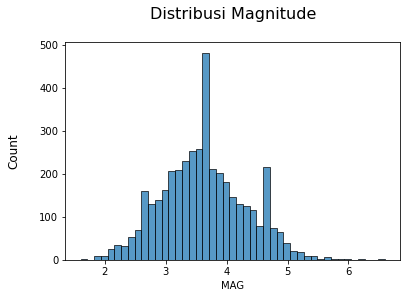

In [13]:
plt.title('Distribusi Magnitude\n',fontsize=16)
plt.ylabel('Count\n', fontsize=12)
sns.histplot(events_df.MAG)

In [15]:
print('Min Dep',events_df['DEP'].min(),'\nMax Dep',events_df['DEP'].max())

Min Dep 10.0 
Max Dep 643.0


In [16]:
print('Min Mag',events_df['MAG'].min(),'\nMax Mag',events_df['MAG'].max())

Min Mag 1.6 
Max Mag 6.6
